# **Liver Disease Prediction with Machine Learning**

## **Introduction**

**Liver disease** is any disturbance of liver function that causes illness. The liver is responsible for many critical functions within the body and should it become diseased or injured, the loss of those functions can cause significant damage to the body. Liver disease is also referred to as hepatic disease.

(source: https://www.medicinenet.com/liver_disease/article.htm)

According to the latest WHO data published in 2018 Liver Disease Deaths in Malaysia reached 2,480 or 1.76% of total deaths. The age adjusted Death Rate is 9.96 per 100,000 of population ranks Malaysia #125 in the world.

(source: https://www.worldlifeexpectancy.com/malaysia-liver-disease)

**Data analytics and machine learning** are critical tools for analysing large datasets and predicting outcomes. We proposed a few liver disease prediction models and compared their accuracy in order to better classify liver disease based on numerous of external factors in this project.

Hence, for this machine learning project, we chose a dataset from the **medical domain**, liver disease. We developed this machine learning model **to predict whether or not a patient has liver disease** respect to the variables presented.

**Steps that will be performed:**


1.   Import Necessary Libraries
2.   Read In and Explore the Data
3.   Data Analysis
4.   Data Visualization
5.   Choosing the Best Model
6.   Discussion
7.   Conclusion







## **1. Import Necessary Libraries**

Import all the necessary libraries.

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Upload the dataset: liver_disease.csv.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving liver_disease.csv to liver_disease.csv


Note: Rerun this cell to enable upload widget because it is only available when executed in the current browser session.

## **2. Read In and Explore the Data**

Read the training and test data.

In [3]:
liver_df = pd.read_csv('liver_disease.csv')

In [4]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**Dataset:** This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.

(source: https://www.kaggle.com/sanjames/liver-patients-analysis-prediction-accuracy/data)

**Note:** The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).

The following features are utilised to make the predictions:


*   **Total Bilirubin:** This is a blood test that measures the amount of a substance called bilirubin. A small amount of bilirubin in your blood is normal, but a high level may be a sign of liver disease.
*  **Direct Bilirubin:** In the liver, bilirubin is changed into a form that your body can get rid of.
*   **Alkaline Phosphotase:** An enzyme is a type of protein in a cell that acts as a catalyst and allows certain bodily processes to happen.
*   **Aspartate Aminotransferase:** This is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases itself into your bloodstream.
*   **Total Proteins:** This is a test that measures the total amount of two classes of proteins found in the fluid portion of your blood. These are albumin and globulin.
*   **Albumin:** Helps prevent fluid from leaking out of blood vessels.
*   **Albumin and Globulin Ratio:** This is a test that compares the concentrations of albumin and globulin in the blood.

In [5]:
liver_df.describe(include="all")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


## **3. Data Analysis**

Data types for each feature.

In [6]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**Observations:**


1.   Only gender is a non-numeric variable while others are numeric variables.
2.   There are 10 features and 1 output - dataset. Value '1' indicates that the patient has liver disease and '2' indicates the patient does not have liver disease.



**Note:** Discrete variables are usually the 'int' type and continuous variables are usually the 'float' type.

Features that are available in the dataset.

In [7]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Checking for any null values.

In [8]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values, indicating 4 missing values.

## **4. Data Cleaning**

To check whether the missing values can be obtained or replaced. Before that, unrelevant column are dropped for the time being.

In [9]:
R= liver_df.drop(['Age', 'Gender',	'Dataset'],axis=1)

In [10]:
R

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,34,5.9,1.6,0.37
579,0.6,0.1,98,35,31,6.0,3.2,1.10
580,0.8,0.2,245,48,49,6.4,3.2,1.00
581,1.3,0.5,184,29,32,6.8,3.4,1.00


To count the number of non-zero values in each column.

In [11]:
print("Attributes       Number of non-Zeroes")
R.astype(bool).sum(axis=0)

Attributes       Number of non-Zeroes


Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    583
dtype: int64

In [12]:
print("Attributes       Number of Zeroes (out of 583)")
(R == 0).astype(int).sum(axis=0)

Attributes       Number of Zeroes (out of 583)


Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

Fortunately, it is clear that the missing values are present and data cleaning is not necessary.

## **5. Data Visualization**

**Before visualizing the data, some predictions are made:**


*   The **age** does not really affect the possibility of having liver disease.
*   The **gender** of the patients will not affect liver disease.
*   The patients with high **total bilirubin** score are more likely to have liver disease.
*   The patients with higher than normal level of **direct bilirubin** indicates liver disease.
*    The patients with high **alkaline phosphostate** score indicates liver disease.
*   The patients with high **alanine aminotransferase** score indicates liver disease.
*    The patients with high **aspartate aminotransferase** score indicates liver disease.
*   The patients with low level of **total proteins** indicates of liver disease.
*   The patients with low level of **albumin** indicates of liver disease.
*   The patients with high **albumin and globulin ratio** score are more likely to have liver disease.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

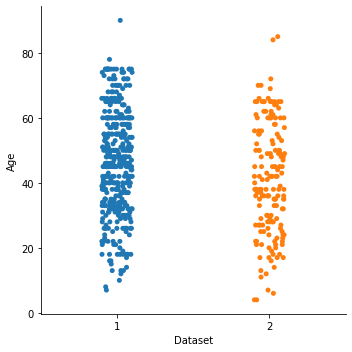

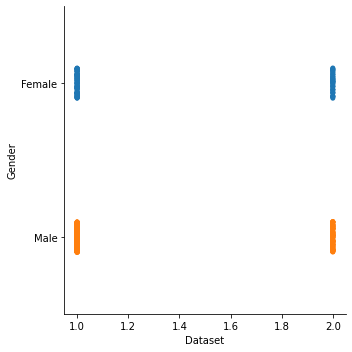

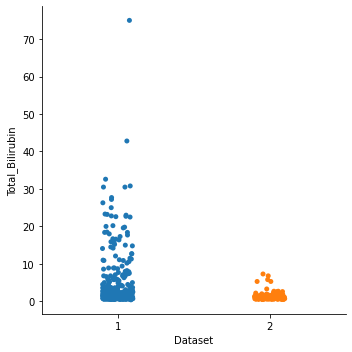

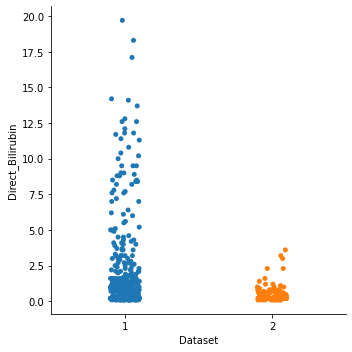

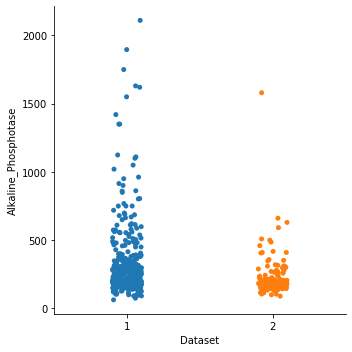

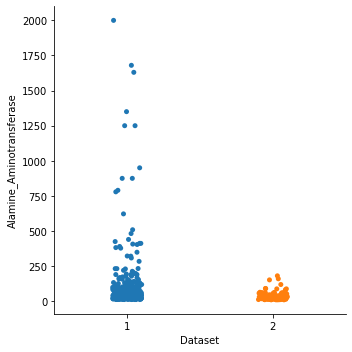

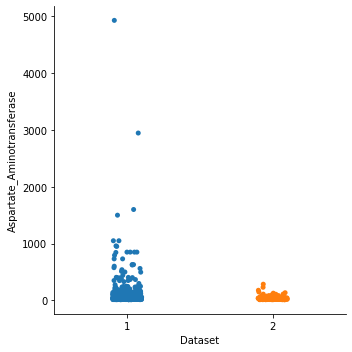

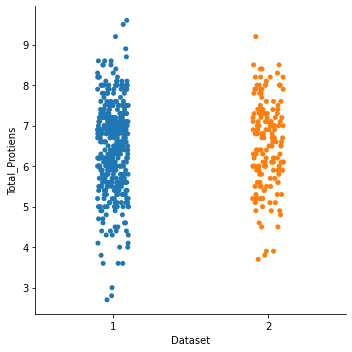

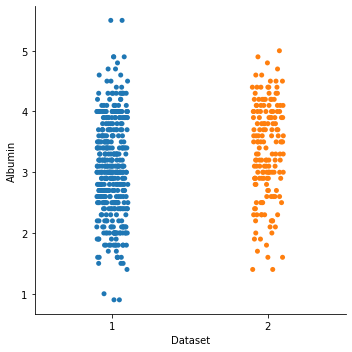

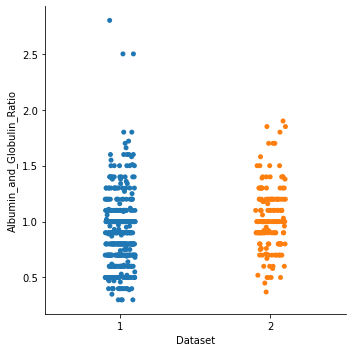

In [13]:
for col in liver_df.columns:
  if col != "Dataset":
      sns.catplot("Dataset", col, 
               data = liver_df)

**Age**: From the graph, the number of dots for both dataset are almost the same. This shows that liver disease will not be affected by age. The prediction is true.

**Gender:** From the graph, the number of dots for both dataset are static. This shows that the possibility of having liver disease will not be affected by gender. The prediction is true.

**Total Bilirubin:** From the graph, the number of blue dots are more than orange dots from 10 to 30 μmol/L. This shows that the total bilirubin count affects the possibility of having liver disease. The prediction is true.

**Direct Bilirubin:** From the graph, the number of blue dots are likely higher than orange dots from 5.0 to 20.0 μmol/L. This means that the higher the direct bilirubin the higher the possibility of having liver disease. The prediction is true.

**Alkaline Phosphotase:** From the graph, the number of blue dots are significantly higher than orange dots from 500 to 2000 μmol/L. This proves that the more the alkaline phosphotase count the more the possibility of having liver disease. The prediction is true.

**Alanine Aminotransferase:** From the graph, the blue dots are slightly higher than orange dots around 250 to 1500 μmol/L. This shows that, alanine aminotransferase's high count does increases the possible liver disease cases. The prediction is true.

**Aspartate Aminotransferase:** From the graph, the blue dots are slightly higher than orange dots around 500 to 1500 μmol/L. This means that, the higher aspartate Aminotransferase count the higher the possible liver disease cases. The prediction is true.

**Total Proteins:** From the graph, the blue dots and orange dots are almost at the same count level. This means that the total protein does not make a significant impact on liver disease. Unfortunately, the prediction is false.

**Albumin:** From the graph, the blue dots and orange dots are almost same. This may mean that the albumin count rate may not affect liver disease cases. The prediction is false.

**Albumin and Globulin Ratio:** From the graph, the blue dots and orange dots are static and sticking at the same count rate. This shows that the albumin and globulin ratio might not affect the posibility of having liver disease. The prediction is false.

These predictions may differ because of posibilities of uncertainities in the data. Hence, several changes will be made on data cleaning process.

## **6. Choosing The Best Model**

**Testing Different Models**

**Machine learning** is a field of study and is concerned with algorithms that learn from examples.

**Classification** is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain.

(source:https://machinelearningmastery.com/types-of-classification-in-machine-learning/)

**The training data will be tested using the following models:**


*   Logistic Regression.
*   Gaussian Naive Bayes.
*   Random Forest Classifier.




Before testing models, the dataset has to be redesigned and cleaned.

In [14]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to indicator variables.

In [15]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [16]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [17]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [18]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [19]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [20]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [21]:
X = liver_df.drop(['Gender','Dataset'], axis=1)


In [22]:
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [23]:
y = liver_df['Dataset']

Now, for the correlation.

In [24]:
liver_corr = X.corr()

In [25]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


The changes are done. Import modules for model testing and split the dataset.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


### **Logistic Regression**

Logistic Regression Training Score: 
 72.06
Logistic Regression Test Score: 
 68.0
Coefficient: 
 [[-0.00994993 -0.09851215 -0.30688722 -0.00082939 -0.01078829 -0.00275598
  -0.23899669  0.40208933  0.59475503  0.25335289  0.09115993]]
Intercept: 
 [0.36100671]
Accuracy: 
 0.68
Confusion Matrix: 
 [[107  17]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.86      0.79       124
           2       0.41      0.24      0.30        51

    accuracy                           0.68       175
   macro avg       0.57      0.55      0.55       175
weighted avg       0.64      0.68      0.65       175



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


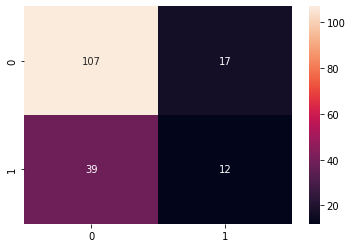

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

### **Gaussian Naive Bayes**

Gaussian Score: 
 56.13
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



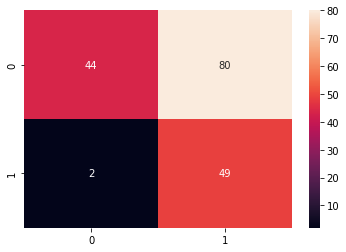

In [29]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)

print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

### **Random Forest Classifier**

Random Forest Score: 
 100.0
Random Forest Test Score: 
 68.0
Accuracy: 
 0.68
[[102  22]
 [ 34  17]]
              precision    recall  f1-score   support

           1       0.75      0.82      0.78       124
           2       0.44      0.33      0.38        51

    accuracy                           0.68       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.68      0.67       175



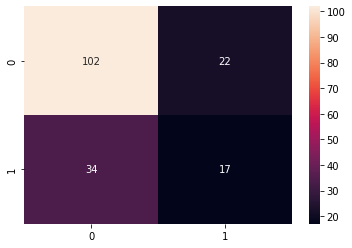

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

### **Model Evaluation**

To choose the best model, evaluation of all these models need to be ranked.

In [35]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,72.06,68.00
2,Random Forest,100.00,68.00
1,Gaussian Naive Bayes,56.13,53.14


## **7. Discussion**

### **Comparison Between Models**

**Logistic Regression**, **Gaussian Naive Bayes** and **Random Forest Classifier** are one of the examples of supervised learning. It can be considered that these three methods are the most understandable and easiest to be explained. The availabilty of clear diagram and structure helps to communicate and analyze the results obtained.

The **Logistic Regression** is a type of statistical analysis which is frequently utilized in predictive analytics and modelling, as well as machine learning applications. The dependant variable in this analytics approach is either finite or categorical. By estimating probabilities using a logistic regression equation, it is employed in statistical software to comprehend the relationship between the dependent variable and one or more independent variables.

The **Gaussian Naive Bayes** is based on Bayes' Theorem. The basic assumptions are that all of the traits are independent of one another and contribute equally to the final result; they are all equally important. However, in actual life, these assumptions are not always accurate (there are cons). The Bayes' theorem lies at the heart of this probabilistic classifier scheme.

The **Random Forest Classifier** is regarded a very accurate and robust method. Missing values can also be handled using random forests. There are two methods for dealing with missing values: utilising median values to replace continuous variables and finding the proximity-weighted average.

Due to imbalanced dataset, Gaussian Naive Bayes performed quite poorly compared to the other two since it is not much efficient when it comes to imbalanced data.

Logistic Regression made a great impact among these three but however it was not capable enough to handle the weightage of the dataset.

As the results speak, Random Forest Classifier has been the most accurate since it managed to handle the missing values in the imbalanced dataset and was unlikely to overfit like the other two did.

### **Limitations**

Due to the constraint of the dataset, we are unable to predict the types of liver disease such as hepatitis C and hemochromatosis. Oversampling or undersampling of data had not been carried out.

### **Impacts**

Machine learning is being used in a variety of healthcare settings, from case management of common chronic conditions to utilising patient health data in conjunction with environmental factors such as pollution exposure and weather. Machine learning technology can assist doctors in developing accurate medication treatments customised features by processing huge amounts of data. Future research might be done to turn it into an early diagnosis tool or perhaps a meal recommendation tool, as well as an AI health advisor. Future study should focus on improving the dataset and estimating the possibility of a healthy liver to becoming a damaged liver in the next few years.

## **8. Conclusion**

Therefore, liver disease is a growing problem in today's world that should not be ignored. Computational modeling and machine learning can be used to identify underlying trends or information in databases, which can then be utilised to make accurate predictions. In this project, a few classification methods are studied and their accuracy are compared, in which Random Forest Classifier gives the highest accuracy (100), followed by Logistic Regression (73.04) and lastly, Gaussian Naive Bayes with the lowest accuracy (58.33). It can be concluded that Random Forest Classifier is the best model for this classification task. Future study should focus on improving the dataset and estimating the possibility liver damages that can occur in coming years.